# 6.2 Exploring Relationships Adidas

1.Importing Visualization Libraries and Data¶

2.Exploring Relationships

 -Correlations
 
 -Scatterplots
 
 -Pair Plots
 
 -Categorical Plots

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
from pathlib import Path


In [2]:
path = Path("C:/", "Users", "nayla", "Desktop", "Carrer F", "Curso de inmersion", "Unidad 6")

In [3]:
data = pd.read_csv( 
    path.joinpath('02 data', 'Adidas_US_Sales-clean.csv'), index_col=0, sep=",")


### Create a correlation heatmap using seaborn:

In [4]:
# Create a subset excluding the "Invoice Date" 
sub=data.iloc[:,[0,2,3,4,5,6,7,8,9,10,11]]

In [5]:
sub

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,50,In-store
1,Foot Locker,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,30,In-store
2,Foot Locker,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,35,In-store
3,Foot Locker,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,35,In-store
4,Foot Locker,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,30,In-store
...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896,28,Outlet
9644,Foot Locker,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1378,32,Outlet
9645,Foot Locker,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791,37,Outlet
9646,Foot Locker,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1235,42,Outlet


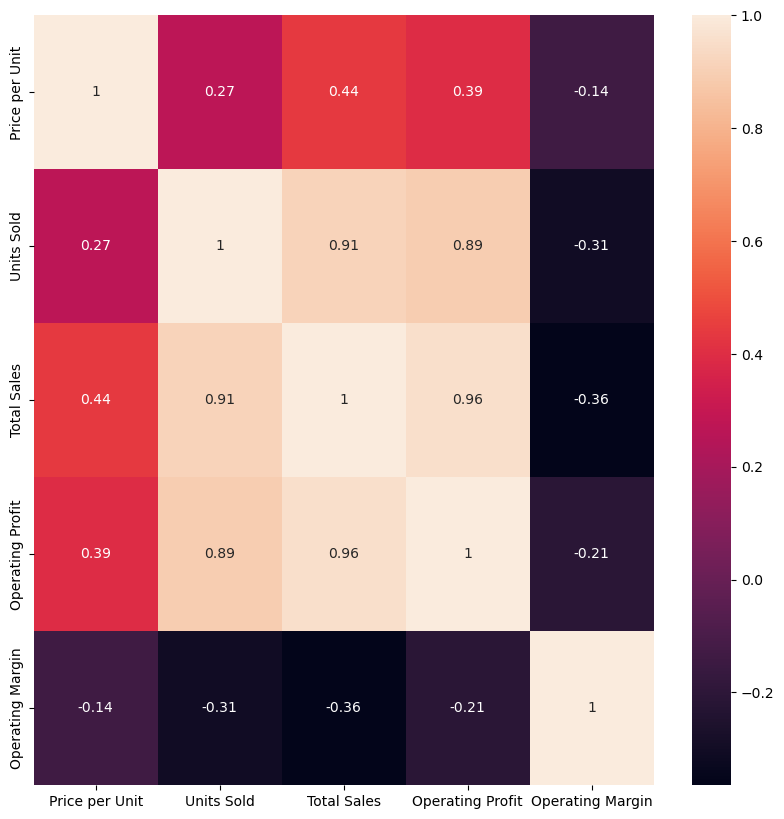

In [6]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

## Scatterplots:

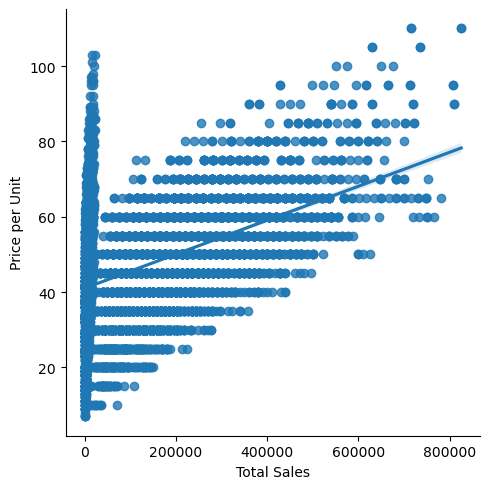

In [7]:
# Create a scatterplot for the "house age" and "price per unit" columns in seaborn

sns.lmplot(x = 'Total Sales', y = 'Price per Unit', data = sub)

In [8]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Margin']]

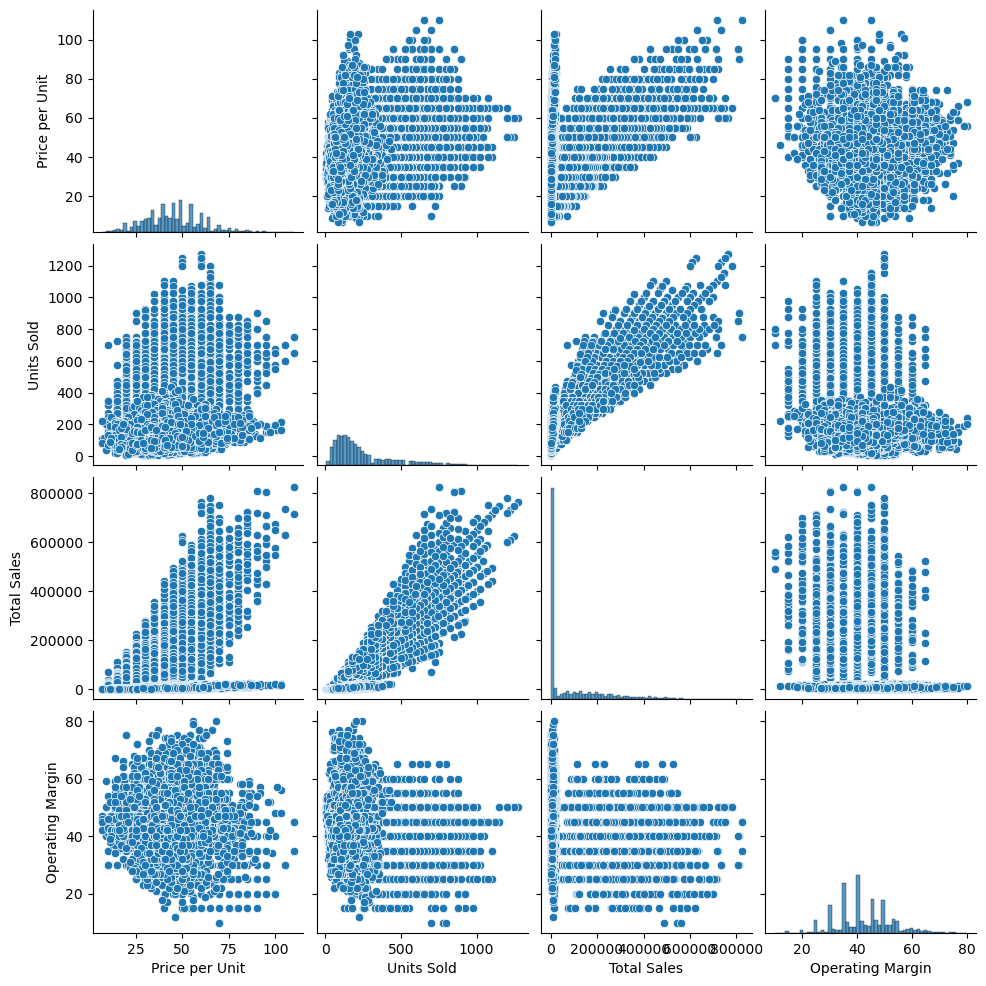

In [9]:
# Create a pair plot 

g = sns.pairplot(sub_2)

## Categorical Plots:

<AxesSubplot:xlabel='Price per Unit', ylabel='Count'>

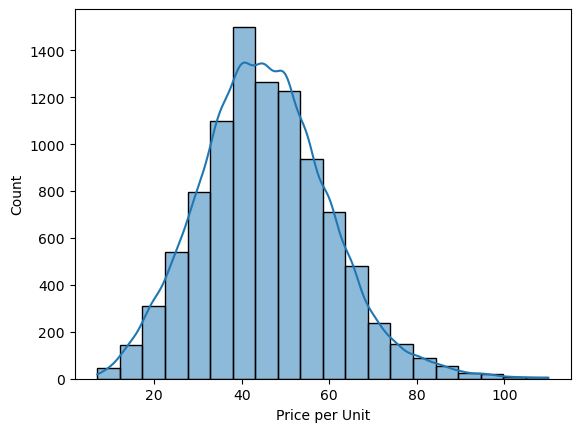

In [10]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(sub['Price per Unit'], bins = 20, kde = True)

In [11]:
sub.loc[sub['Price per Unit'] < 30, 'Price category'] = 'Low price'

In [12]:
sub.loc[(sub['Price per Unit'] >= 30) & (sub['Price per Unit'] < 60), 'Price category'] = 'Middle price'

In [13]:
sub.loc[sub['Price per Unit'] >= 60, 'Price category'] = 'High price'

In [14]:
sub['Price category'].value_counts(dropna = False)

Middle price    6669
High price      1661
Low price       1314
Name: Price category, dtype: int64

In [15]:
sub.columns

Index(['Retailer', 'Region', 'State', 'City', 'Product', 'Price per Unit',
       'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin',
       'Sales Method', 'Price category'],
      dtype='object')

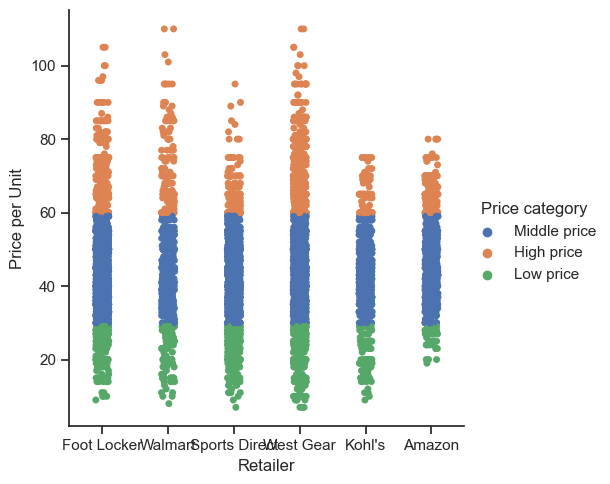

In [16]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Retailer", y="Price per Unit", hue="Price category", data=sub)